In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path_main = "API_19_DS2_en_excel_v2_6002116.xls"


In [5]:
def initialize_data(main_data): 

    # Reads the data file and takes out all the sheets from it
    df_data = pd.read_excel(main_data, header=3)
    df_country_meta_data = pd.read_excel(main_data, sheet_name='Metadata - Countries')

    # Merged columns from Data and Country MetaData
    df_data_merged = pd.merge(df_data, df_country_meta_data, on='Country Code', how='inner')
    df_data_merged = df_data_merged.reset_index()

    # Sorting Columns out, changing column positions to start of df, and removing unwanted columns
    columns_list = df_data_merged.columns.tolist()
    columns_list.insert(4, columns_list.pop(df_data_merged.columns.get_loc('Region')))
    columns_list.insert(5, columns_list.pop(df_data_merged.columns.get_loc('IncomeGroup')))
    df_data_merged = df_data_merged[columns_list]
    df_data_merged = df_data_merged.drop(columns=['SpecialNotes', 'TableName', 'index'], axis=1)

    # Setting Multilevel Index for df (df_country)
    df_country = df_data_merged.set_index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Indicator Code', 'Indicator Name'])

    df_country = df_country.loc[pd.IndexSlice[:, :, :, ('Upper middle income', 'Lower middle income', 'High income', 'Low income'), :, :], :]

    return df_country

In [6]:
df_country = initialize_data(path_main)


df_population_total = df_country.loc[pd.IndexSlice[:, :, :, :, ('SP.POP.TOTL'), :], :]

df_urban_agglo = df_country.loc[pd.IndexSlice[:, :, :, :, ('EN.URB.MCTY.TL.ZS'), :], :]

df_urban_population = df_country.loc[pd.IndexSlice[:, :, :, :, ('SP.URB.TOTL'), :], :]

df_education = df_country.loc[pd.IndexSlice[:, :, :, :, ('SE.PRM.CMPT.ZS'), :], :]


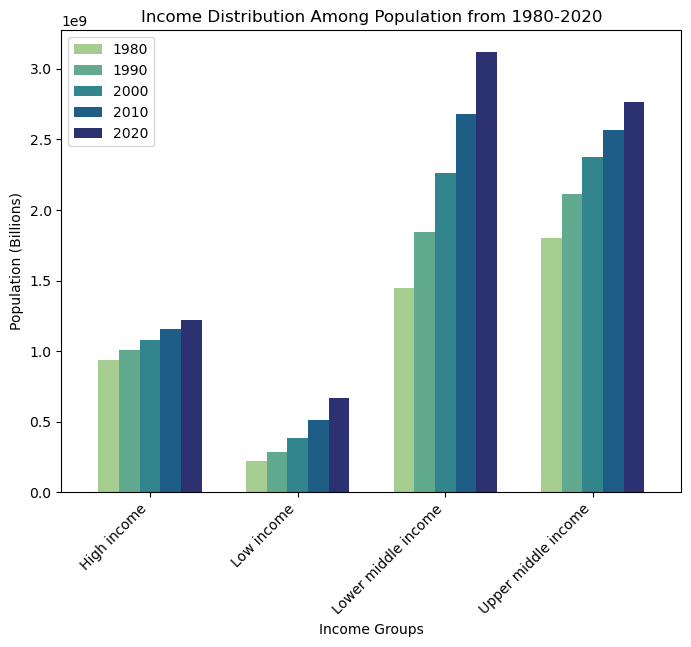

In [7]:
df_population_total.reset_index(inplace=True)
df_urban_agglo.reset_index(inplace=True)
df_urban_population.reset_index(inplace=True)
# df_poverty.reset_index(inplace=True)
df_education.reset_index(inplace=True)

df_pop_total = pd.melt(df_population_total, id_vars=['Country Name', 'Indicator Name', 'IncomeGroup', 'Region'],
                       value_vars=[str(x) for x in range(1980, 2021, 10)])
pop_group = df_pop_total.groupby(['IncomeGroup', 'variable'])['value'].sum().reset_index()
pop_group.pivot(index=['IncomeGroup'], columns='variable', values='value').plot(kind='bar', width=0.7, figsize=(8, 6),
                                                                                colormap='crest')

plt.xlabel('Income Groups')
plt.ylabel('Population (Billions)')
plt.title('Income Distribution Among Population from 1980-2020')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


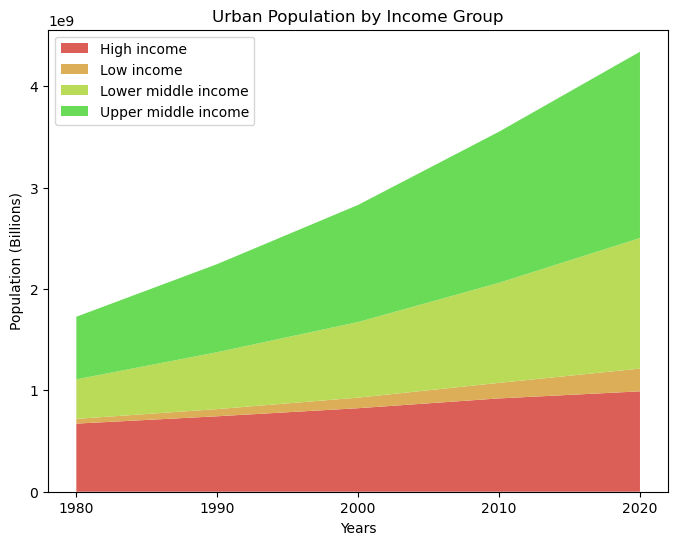

In [8]:
df_urb_pop = pd.melt(df_urban_population, id_vars=['Country Name', 'Indicator Name', 'IncomeGroup'],
                     value_vars=[str(x) for x in range(1980, 2021, 10)])
urb_pop_group = df_urb_pop.groupby(['IncomeGroup', 'variable'])['value'].sum().reset_index()
urb_pop_pivot = urb_pop_group.pivot_table(index='IncomeGroup', columns='variable', values='value')

plt.figure(figsize=(8, 6))

years = urb_pop_pivot.columns
values = urb_pop_pivot.values

palette = sns.color_palette('hls', 10)

plt.stackplot(years, values, labels=urb_pop_pivot.index, colors=palette)

plt.xlabel('Years')
plt.ylabel('Population (Billions)')
plt.title('Urban Population by Income Group')
plt.legend(loc='upper left')

plt.show()

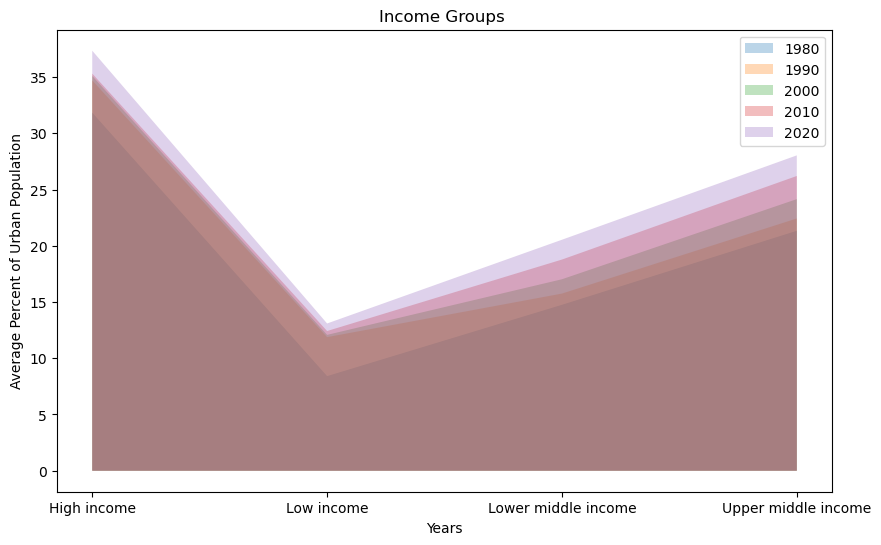

In [9]:
df_agglo = pd.melt(df_urban_agglo, id_vars=['Country Name', 'Indicator Name', 'IncomeGroup'],
                   value_vars=[str(x) for x in range(1980, 2021, 10)])
agglo_group = df_agglo.groupby(['IncomeGroup', 'variable'])['value'].mean().reset_index()
agglo_pivot = agglo_group.pivot_table(index='IncomeGroup', columns='variable', values='value')
# Filled Area Plot for Average Percentage of Urban Population by Income Group
plt.figure(figsize=(10, 6))
for country in agglo_pivot.columns:
    plt.fill_between(agglo_pivot.index, agglo_pivot[country], label=country, alpha=0.3)

plt.xlabel('Years')
plt.ylabel('Average Percent of Urban Population')
plt.title('Income Groups ')
plt.legend()
plt.show()


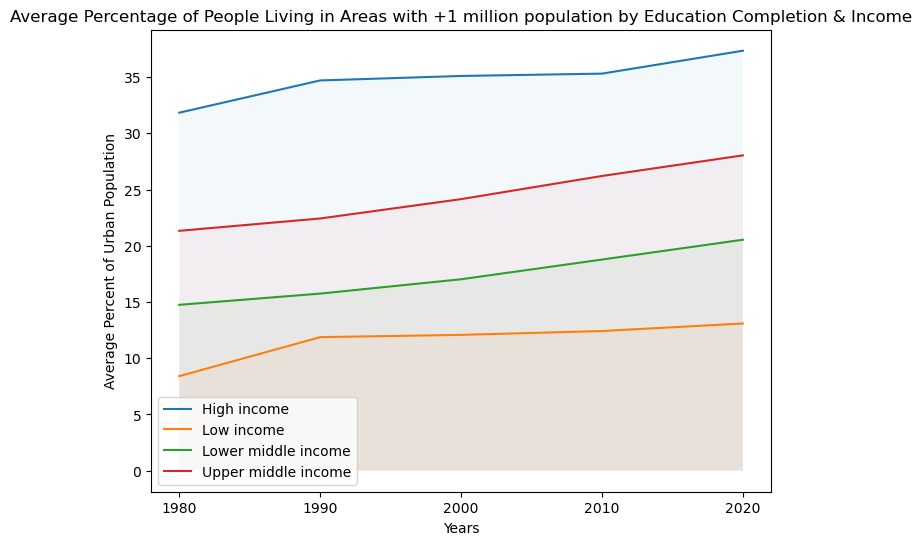

In [10]:
df_education = pd.melt(df_urban_agglo, id_vars=['Country Name', 'Indicator Name', 'IncomeGroup'],
                      value_vars=[str(x) for x in range(1980, 2021, 10)])
o_group = df_agglo.groupby(['IncomeGroup', 'variable'])['value'].mean().reset_index()
agglo_pivot = agglo_group.pivot_table(index='IncomeGroup', columns='variable', values='value')

plt.figure(figsize=(8, 6))

line1_data = agglo_pivot.transpose()
for country in line1_data.columns:
    plt.plot(line1_data.index, line1_data[country], label=country)
    plt.fill_between(line1_data.index, line1_data[country], alpha=0.05)

plt.xlabel('Years')
plt.ylabel('Average Percent of Urban Population')
plt.title('Average Percentage of People Living in Areas with +1 million population by Education Completion & Income')
plt.legend() 

plt.show()